In [1]:
import numpy as np
from scipy import signal
from scipy.interpolate import interp1d
from scipy.signal import butter, filtfilt, iirdesign, zpk2tf, freqz
from scipy.interpolate import spline

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import math
import wave
import sys

# Uploading data

In [2]:
data = np.genfromtxt("dados/C100_F5K_D1_P2_R1.txt", delimiter=' ', names=['x', 'y'])

# Organizing data in the matrix

In [3]:
DATASET_SIZE = len(data['y']) # %signal length
GROUP_SIZE = 1000
GROUP_AMOUNT = int(math.floor(DATASET_SIZE/GROUP_SIZE))
flag = 0
matrix = [[0.0 for x in range(GROUP_SIZE)] for y in range(GROUP_AMOUNT)]

for i in range (0,GROUP_AMOUNT):
	for j in range(0,GROUP_SIZE):
		matrix[i][j] =  data['y'][flag]
		flag = flag + 1


# Product by 1st column

In [4]:
c = [[matrix[x][0]*matrix[x][y] for y in range(GROUP_SIZE)] for x in range(GROUP_AMOUNT)]

# Average columns

In [5]:
avg_I = [] 
count = 0.0
for j in range(0,GROUP_SIZE):
	for i in range (0,GROUP_AMOUNT):
		count = count + c[i][j]
	avg_I.append(count/GROUP_AMOUNT)
	count = 0.0

# Autocorrelation

In [6]:
corr = [avg_I[x]/avg_I[0] for x in range(GROUP_SIZE)] 

/home/maelso/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


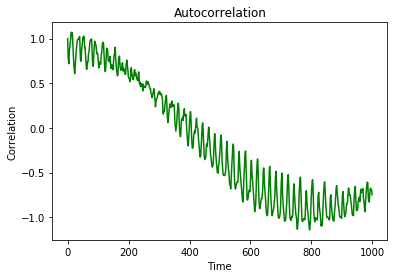

In [7]:
fig1 = plt.figure()
plt.ylabel('Correlation') 
plt.xlabel('Time')

ax1 = fig1.add_subplot(111)
ax1.set_title("Autocorrelation")

ax1.plot(corr, color='g', label='Autocorrelation')

/home/maelso/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


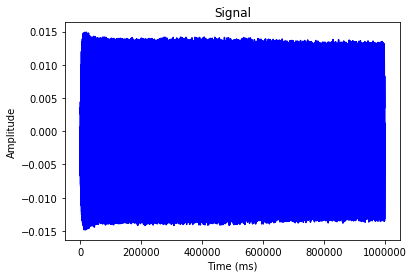

In [8]:
fig2 = plt.figure()
plt.ylabel('Amplitude') 
plt.xlabel('Time (ms)')

ax2 = fig2.add_subplot(111)
ax2.set_title("Signal") 

ax2.plot(data['y'], color='b', label='Signal')